In [131]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Some image examples: 
10_1477147632.jpg


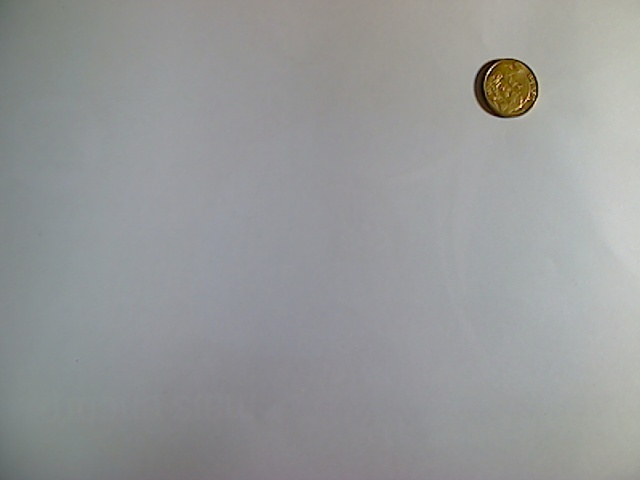

10_1477147698.jpg


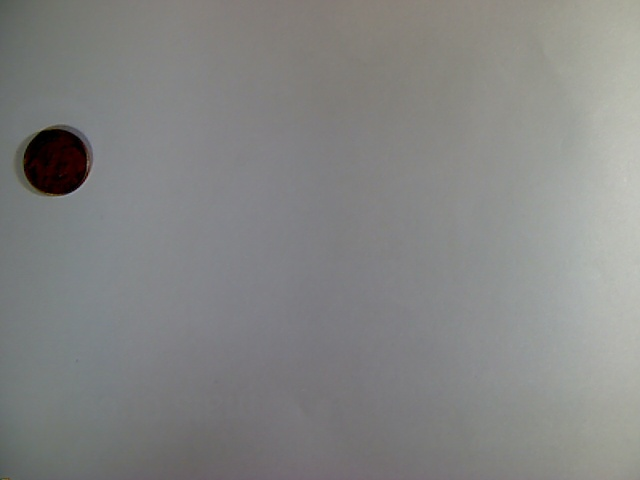

In [132]:
folder = "../data/deeplearning/all"
print("Some image examples: ")

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [148]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('../data/deeplearning/10/10_1477147698.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='10', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely




from keras.preprocessing.image import ImageDataGenerator
def data_augmentation():
    datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
    
    datagen.fit(X_train)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    samples_per_epoch=len(X_train), nb_epoch=nb_epoch)
    pass

TypeError: flow() takes at least 3 arguments (6 given)

In [134]:
def my_img_to_array(image_files):
    
    #Medidas originais 
    image_width = 640
    image_height = 480
    ratio = 4
    
    image_width = image_width / ratio
    image_height = image_height / ratio


    channels = 3
    nb_classes = 1

    dataset = np.ndarray(shape=(len(image_files), channels, image_height, image_width),
                         dtype=np.float32)

    i = 0
    for _file in image_files:
        img = load_img(folder + "/" + _file)  # this is a PIL image
        img.thumbnail((image_width, image_height))
        #img = img.convert('L')
        # Transformando em Numpy Array
        x = img_to_array(img)  
        #print(x.shape)
        #x = x.reshape((1,) + x.shape)
        # Normalizando
        x = (x - 128.0) / 128.0
        dataset[i] = x
        i += 1
        if i % 100 == 0:
            print("%d images to array" % i)
    
    return dataset

In [135]:
train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))


from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Medidas originais 
image_width = 640
image_height = 480
ratio = 4

image_width = image_width / ratio
image_height = image_height / ratio

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    #img = img.convert('L')
    # Transformando em Numpy Array
    x = img_to_array(img, dim_ordering="th")  
    #print(x.shape)
    #x = x.reshape((1,) + x.shape)
    # Normalizando
    x = (x - 128.0) / 128.0
    dataset[i] = x
    #print dataset[i].shape
    i += 1
    if i % 100 == 0:
        print("%d images to array" % i)
print("All images to array!")
    

Files in train_files: 605
100 images to array
200 images to array
300 images to array
400 images to array
500 images to array
600 images to array
All images to array!


In [136]:
from sklearn.cross_validation import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)

In [137]:
labels = {"5": 0, "10": 1, "25": 2, "50":3, "100":4} 
nb_classes = len(labels)
y_train = [labels[str(x)] for x in y_train]
y_test = [labels[str(x)] for x in y_test]
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
y_train[:5]

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [149]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [ ]:
from keras.optimizers import SGD
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
    
#model.compile(loss='mse',
#              metrics=['accuracy'], optimizer='rmsprop')

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='rmsprop')

"""
model.fit(X_train, 
          y_train,
          nb_epoch=20, 
          batch_size=20, 
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])
"""
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=40, 
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/40
484/484 [==============================] - 44s - loss: 3.5591 - acc: 0.2293 - val_loss: 1.5851 - val_acc: 0.2975
Epoch 2/40
484/484 [==============================] - 54s - loss: 1.6209 - acc: 0.2521 - val_loss: 1.5854 - val_acc: 0.3306
Epoch 3/40
484/484 [==============================] - 47s - loss: 1.5501 - acc: 0.3182 - val_loss: 1.5797 - val_acc: 0.2314
Epoch 4/40
484/484 [==============================] - 46s - loss: 1.5400 - acc: 0.3079 - val_loss: 1.5602 - val_acc: 0.3471
Epoch 5/40
484/484 [==============================] - 43s - loss: 1.4584 - acc: 0.3450 - val_loss: 1.5378 - val_acc: 0.4132
Epoch 6/40
484/484 [==============================] - 42s - loss: 1.4263 - acc: 0.3554 - val_loss: 1.5058 - val_acc: 0.3967
Epoch 7/40
484/484 [==============================] - 40s - loss: 1.4253 - acc: 0.3719 - val_loss: 1.5139 - val_acc: 0.3636
Epoch 8/40
484/484 [==============================] - 41s - loss: 1.4172 - acc: 0.3657 - val_loss: 1.5161 - val_acc: 0.2893
Epoch 9/

In [139]:
### Salvando os pesos
#model.save_weights('last_model.h5',overwrite=True)

(faz tempo que esse link tá aqui, nem lembro mais se tinha algo importante)

http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

### Resultados:
Imagem: normalizada, 160x120
Três épocas    
loss: 10092.9179 - val_loss: 12747.4773    
30 épocas  
loss: 17.9679 - val_loss: 3657.0876 

loss: 1370.2057 - val_loss: 3124.1294 

loss: 1297.7805 - val_loss: 2500.0276

loss: 516.1915 - val_loss: 1187.3157

loss: 414.3080 - val_loss: 1146.8943

In [140]:
from math import sqrt
start = time()
predictions = model.predict(X_test)
print("Tempo médio de previsão: {0:.2f}s".format((time() - start)/len(X_test)))
print("Acurácia na previsão: {0}".format(model.evaluate(X_test, y_test)))
#print("Erro médio por pevisão: {0:.2f}".format(sqrt(model.evaluate(X_test, y_test))))

Tempo médio de previsão: 0.03s
121/121 [==============================] - 3s     
Acurácia na previsão: [1.0709941116246311, 0.57851240260541936]


In [141]:
predictions
preds = [np.argmax(pred) for pred in predictions]
preds[0]

2

In [142]:
print("{0:5} {1:10} {2:8}".format("True", "Predicted", "Correct?"))
for i in range(len(preds[:10])):
    print("{0:5} {1:10} {2:8}".format(np.argmax(y_test[i]), preds[i],(np.argmax(y_test[i]) == preds[i])))
          
#print predictions[:5].transpose()
#print y_test[:5]

True  Predicted  Correct?
    2          2        1
    4          2        0
    2          2        1
    4          2        0
    2          2        1
    0          0        1
    1          1        1
    2          1        0
    2          2        1
    4          4        1


### Prevendo valores em imagens novas
Vamos usar uma pasta com o nome "unseen" para colocar imagens para teste.

30/30 [==============================] - 0s
[5.3004474639892578, 0.13333334028720856]
Previsao: 2. Valor real: 1


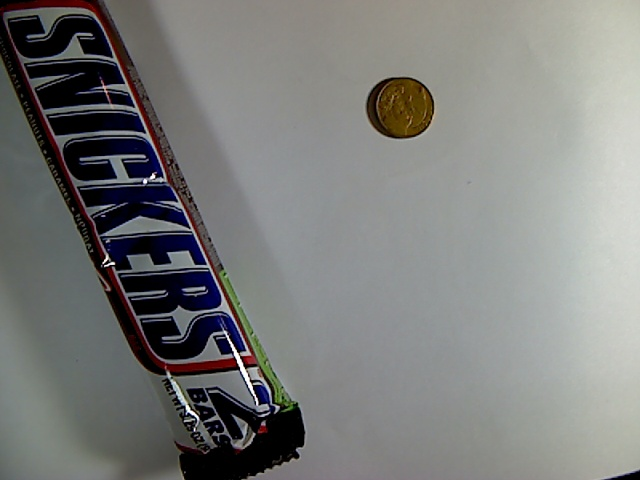

Previsao: 2. Valor real: 3


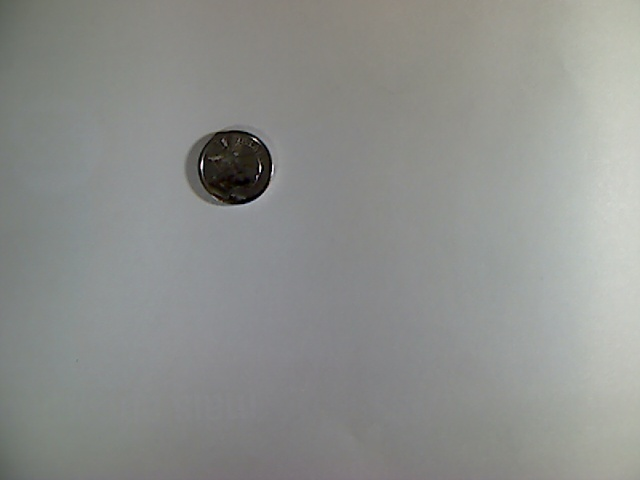

Previsao: 2. Valor real: 3


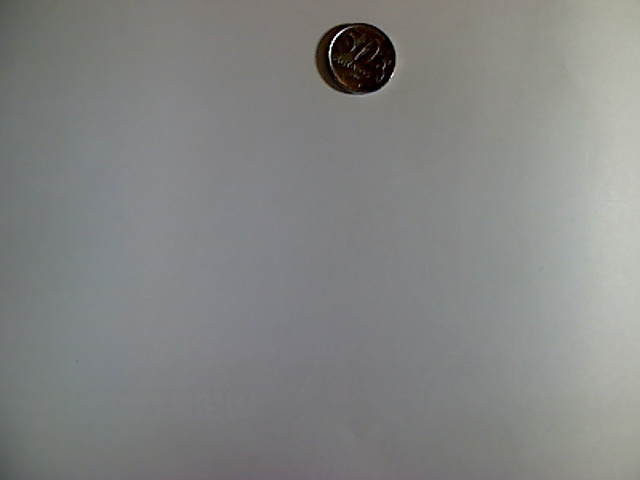

Previsao: 4. Valor real: 3


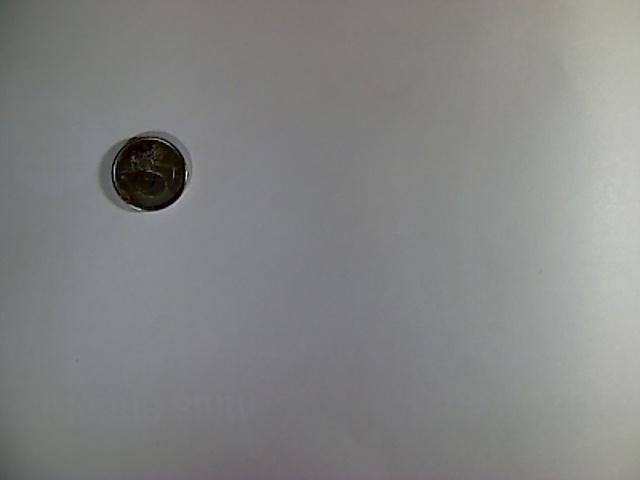

Previsao: 4. Valor real: 2


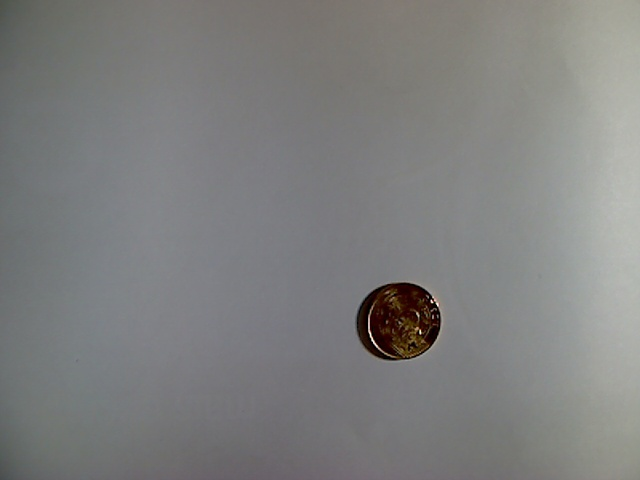

Previsao: 2. Valor real: 2


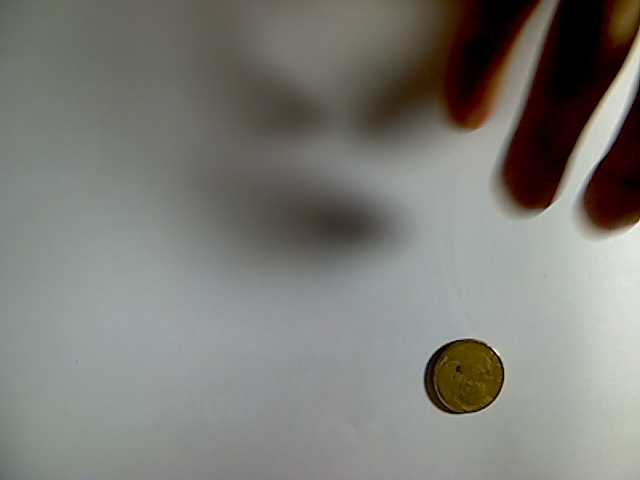

Previsao: 2. Valor real: 1


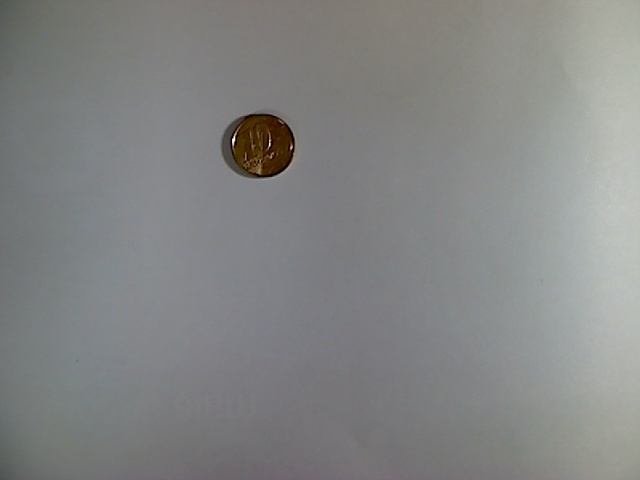

Previsao: 2. Valor real: 1


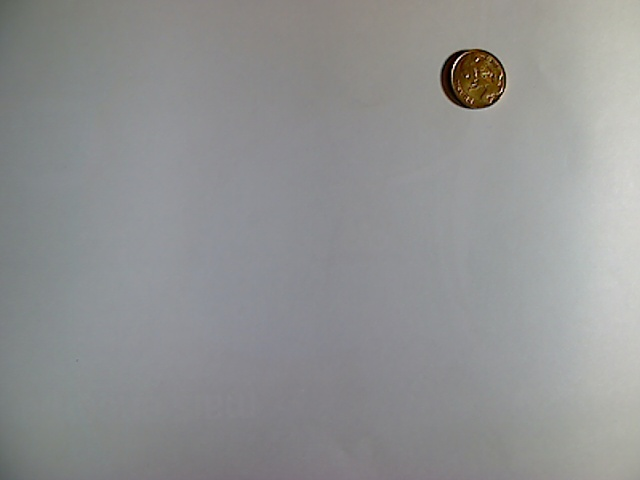

Previsao: 0. Valor real: 3


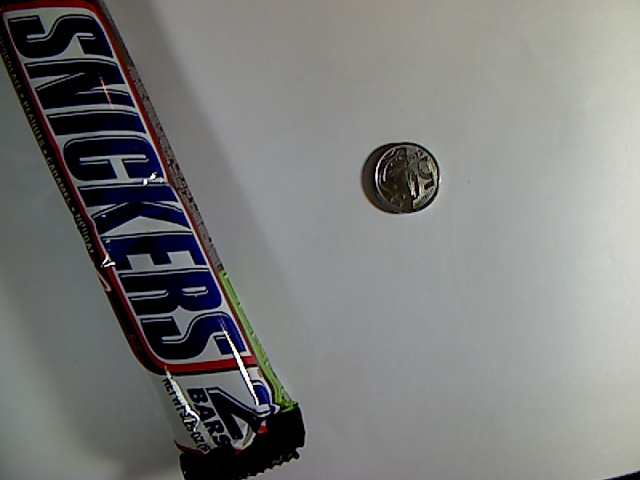

Previsao: 2. Valor real: 1


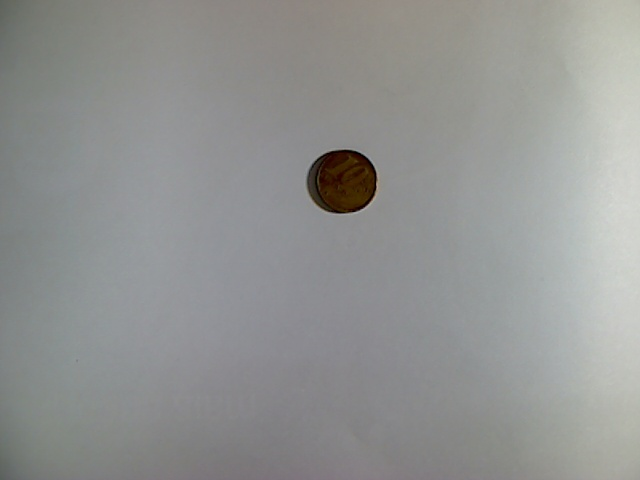

In [143]:
folder = "../data/deeplearning/unseen"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

data = my_img_to_array(onlyfiles)
predictions = model.predict(data)
predictions = [np.argmax(pred) for pred in predictions]

values = []
for i in range(len(onlyfiles[:])):
    label_in_file = onlyfiles[i].find("_")
    value = int(onlyfiles[i][0:label_in_file])
    values.append(value)
    
values = [labels[str(x)] for x in values]
y_unseen = np_utils.to_categorical(values, nb_classes)
print(model.evaluate(data, y_unseen))


for i in range(len(onlyfiles[:10])):
    label_in_file = onlyfiles[i].find("_")
    value = int(onlyfiles[i][0:label_in_file])
    print("Previsao: {0}. Valor real: {1}".format(predictions[i], labels[str(value)]))
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], height=240, width=320))
    


In [37]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(input_dim = 1000, output_dim = 1000))
model.add(Activation('sigmoid'))
model.add(Dense(input_dim = 500, output_dim = 1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

Train on 1043 samples, validate on 116 samples
Epoch 1/10
 120/1043 [==>...........................] - ETA: 353s - loss: 17013.0802

KeyboardInterrupt: 

model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

In [17]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

Train on 1043 samples, validate on 116 samples
Epoch 1/10
1043/1043 [==============================] - 406s - loss: 4022.1758 - val_loss: 4583.2347
Epoch 2/10
1043/1043 [==============================] - 401s - loss: 3901.9772 - val_loss: 4505.3501
Epoch 3/10
1043/1043 [==============================] - 471s - loss: 3779.7666 - val_loss: 4509.8759
Epoch 4/10
1043/1043 [==============================] - 416s - loss: 3709.9707 - val_loss: 4312.1217
Epoch 5/10
1043/1043 [==============================] - 341s - loss: 3703.4259 - val_loss: 4206.3473
Epoch 6/10
1043/1043 [==============================] - 341s - loss: 3619.2232 - val_loss: 4063.0569
Epoch 7/10
1043/1043 [==============================] - 344s - loss: 3523.3877 - val_loss: 4155.7879
Epoch 8/10
1043/1043 [==============================] - 365s - loss: 3455.5242 - val_loss: 4121.4210
Epoch 9/10
1043/1043 [==============================] - 352s - loss: 3408.1444 - val_loss: 4072.7204
Epoch 10/10
1043/1043 [=====================

Previsao: 85. Valor real: 270


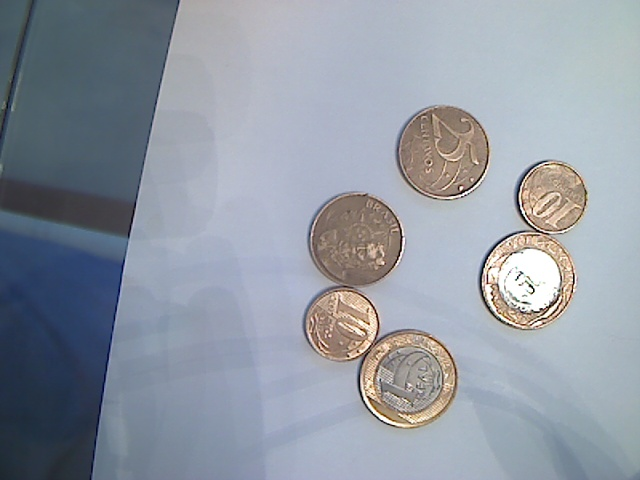

Previsao: 100. Valor real: 220


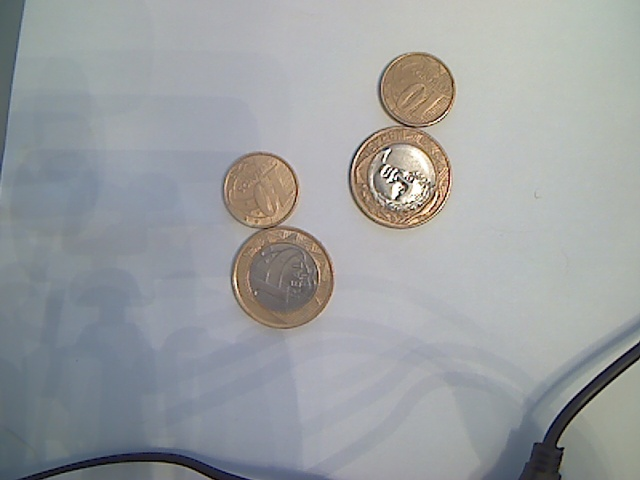

Previsao: 80. Valor real: 270


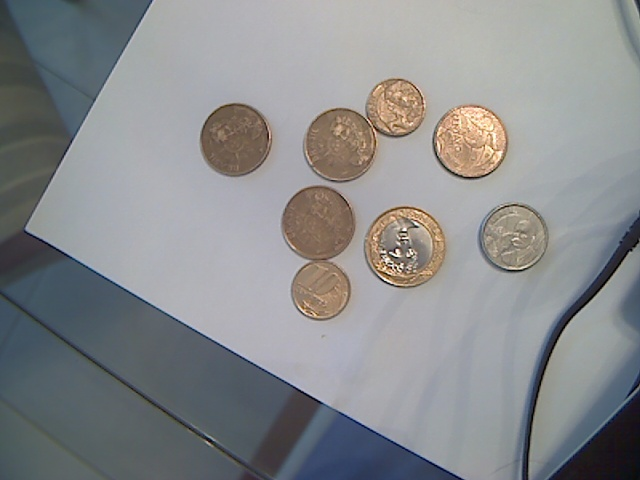

Previsao: 120. Valor real: 160


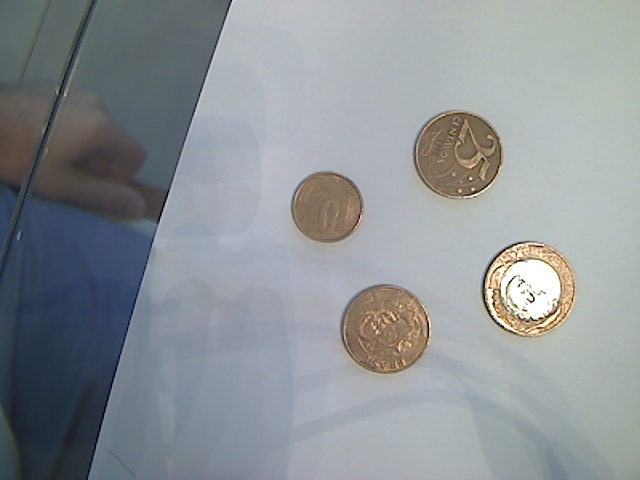

Previsao: 120. Valor real: 270


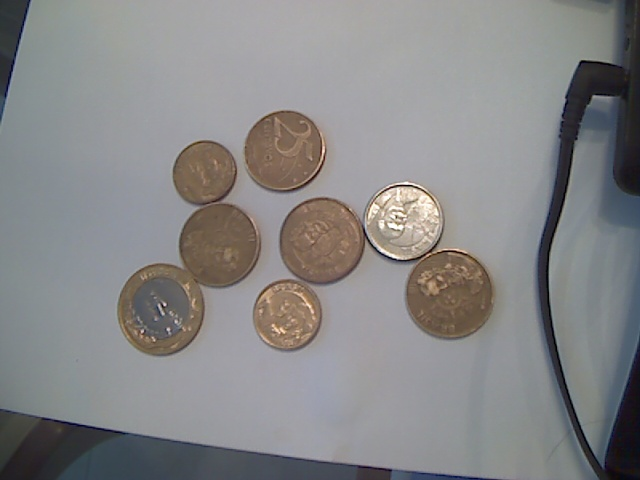

Previsao: 315. Valor real: 270


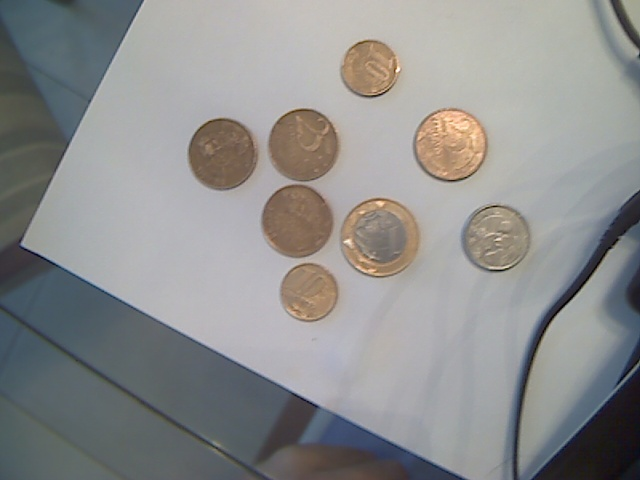

Previsao: 30. Valor real: 110


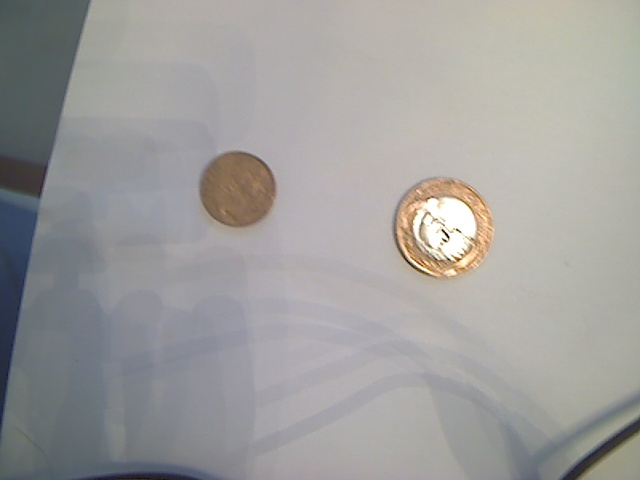

Previsao: 205. Valor real: 245


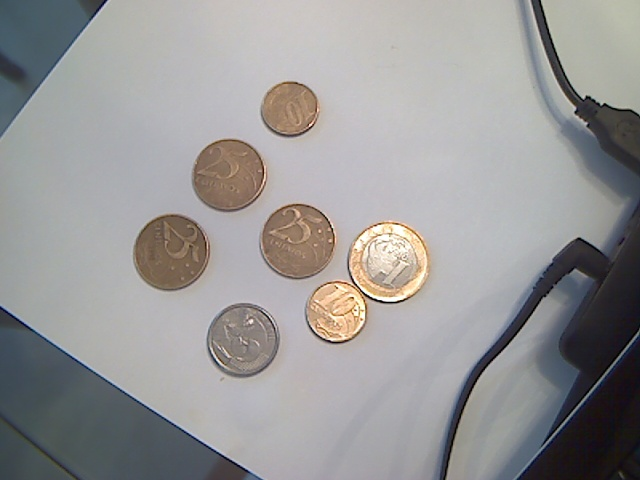

Previsao: 55. Valor real: 270


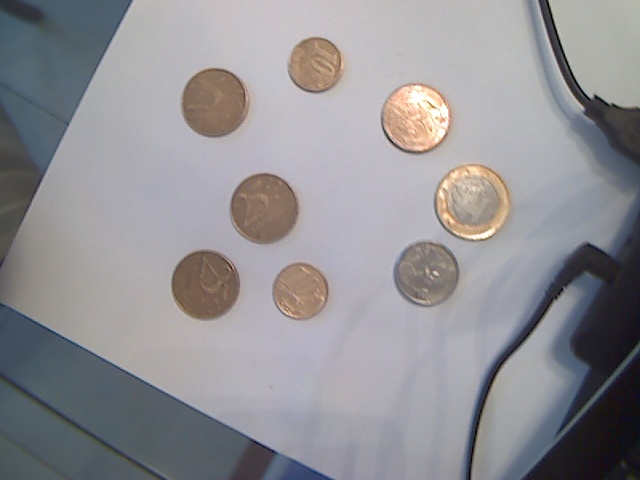

Previsao: 65. Valor real: 160


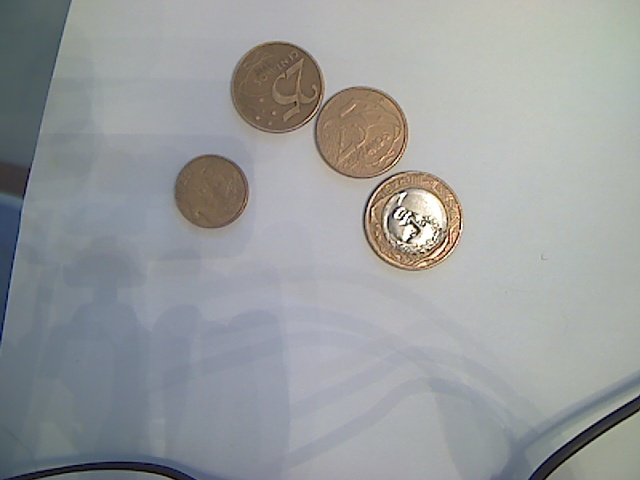

In [18]:
folder = "../data/deeplearning/unseen"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

data = my_img_to_array(onlyfiles)
predictions = model.predict(X_test)
predictions = [closer_multiple(x, multi) for x in predictions]

for i in range(len(onlyfiles[:10])):
    label_in_file = onlyfiles[i].find("_")
    value = int(onlyfiles[i][0:label_in_file])
    print("Previsao: {0}. Valor real: {1}".format(predictions[i], value))
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], height=240, width=320))